In [3]:
# 파이토치 입력 파이프라인 구축
# 텐서에서 파이토치 DataLoader 생성
import torch
from torch.utils.data import DataLoader

t=torch.arange(6, dtype=torch.float32)
print(t)
dataloader=DataLoader(t)
print(dataloader)
for item in dataloader:
    print(item)

tensor([0., 1., 2., 3., 4., 5.])
tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [7]:
t=torch.arange(7, dtype=torch.float32)

data_loader=DataLoader(t, batch_size=3, drop_last=False)
print(t)
for batch in data_loader:
    print(f'배치 : {batch}')

tensor([0., 1., 2., 3., 4., 5., 6.])
배치 : tensor([0., 1., 2.])
배치 : tensor([3., 4., 5.])
배치 : tensor([6.])


In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# 텐서 데이터 준비
f=torch.randn(100,3) # 난수 생성성
print(f'텐서 구조 : {f.shape}')
# print(f)
labels=torch.randint(0,2, (100,))
# print(labels)
# 텐서를 이용한 데이터셋을 생성
# 두 개 이상의 텐서를 묶어 하나의 데이터셋을 생성
dataset=TensorDataset(f, labels)
print(dataset[0])
# print(dataset.shape) error

# 데이터로더 생성
data_loader=DataLoader(dataset, batch_size=16, shuffle=True)

for batch_fs, batch_labels  in data_loader:
    print(batch_fs.size(), batch_labels.size())
    break

텐서 구조 : torch.Size([100, 3])
(tensor([-0.3017,  0.2579, -0.6164]), tensor(0))
torch.Size([16, 3]) torch.Size([16])


In [15]:
# 로컬 디스크에 있는 파일에서 데이터셋 생성
# 특정 디렉토리 안에 있는 파일 목록 생성 확인
import pathlib

# 파일 목록을 추출할 디렉토리 설정
imgdir_path=pathlib.Path('cat_dog_images')

list(imgdir_path.glob('*.jpg'))

[WindowsPath('cat_dog_images/cat-01.jpg'),
 WindowsPath('cat_dog_images/cat-02.jpg'),
 WindowsPath('cat_dog_images/cat-03.jpg'),
 WindowsPath('cat_dog_images/dog-01.jpg'),
 WindowsPath('cat_dog_images/dog-02.jpg'),
 WindowsPath('cat_dog_images/dog-03.jpg')]

In [16]:
file_list=sorted([str(path) for path in imgdir_path.glob('*.jpg')])
file_list

['cat_dog_images\\cat-01.jpg',
 'cat_dog_images\\cat-02.jpg',
 'cat_dog_images\\cat-03.jpg',
 'cat_dog_images\\dog-01.jpg',
 'cat_dog_images\\dog-02.jpg',
 'cat_dog_images\\dog-03.jpg']

Image shape : (900, 1200, 3)
Image shape : (900, 1200, 3)
Image shape : (900, 742, 3)
Image shape : (800, 1200, 3)
Image shape : (800, 1200, 3)
Image shape : (900, 1200, 3)


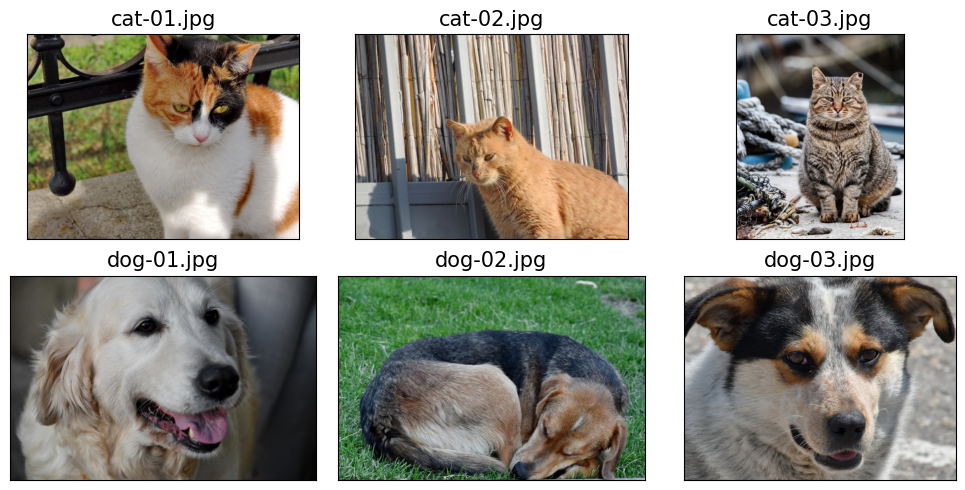

In [23]:
# 원본 이미지를 화면에 출력
import matplotlib.pyplot as plt
import os # 파일처리, 윈도우환경설정 파일 처리, 경로
from PIL import Image
import numpy as np

fig = plt.figure(figsize=(10,5)) # 도화지 생성

for i, file in enumerate(file_list):
    img=Image.open(file) # 해당 file을 읽기
    print(f'Image shape : {np.array(img).shape}')
    ax=fig.add_subplot(2,3,i+1)
    ax.set_xticks([]);ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file),size=15)

plt.tight_layout()
plt.show()

In [24]:
# 파일명에서 레이블 추출 : 강아지(dog)=>1, 고양이(cat) => 0
labels=[1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
labels

[0, 0, 0, 1, 1, 1]

In [ ]:
# Dataset 생성 : 데이터(file_list), 레이블(labels) 묶는다
from torch.utils.data import Dataset

class ImageDataset(Dataset): # Dataset iterable(반복가능, for 에 사용될 수 있다다)
    def __init__(self, file_list, labels): # 생성자자
        self.file_list=file_list
        self.labels=labels
    
    def __getitem__(self, index): # 샘플 한개 추출할 때 사용 메소드드
        file=self.file_list[index]
        label=self.labels[index]
        return file, label
    
    def __len__(self):
        return len(self.labels) # 샘플의 개수 반환

In [26]:
image_dataset=ImageDataset(file_list, labels)

for file, label in image_dataset: # __getitem__(index)
    print(file, ' : ', label)

cat_dog_images\cat-01.jpg  :  0
cat_dog_images\cat-02.jpg  :  0
cat_dog_images\cat-03.jpg  :  0
cat_dog_images\dog-01.jpg  :  1
cat_dog_images\dog-02.jpg  :  1
cat_dog_images\dog-03.jpg  :  1


In [31]:
# Dataset 생성 : 데이터(file_list), 레이블(labels) 묶는다
from torch.utils.data import Dataset
import torchvision.transforms as transforms

img_height, img_width=80,120

transform=transforms.Compose([
    transforms.ToTensor(), # 텐서로 변환
    transforms.Resize((img_height, img_width)) # 80,120 크기 조정
])


class ImageDataset(Dataset): # Dataset iterable(반복가능, for 에 사용될 수 있다다)
    def __init__(self, file_list, labels, transform=None): # 생성자자
        self.file_list=file_list
        self.labels=labels
        self.transform=transform
    
    def __getitem__(self, index): # 샘플 한개 추출할 때 사용 메소드
        img=Image.open(self.file_list[index]) # 해당 인덱스의 이미지 데이터 추출
        if self.transform is not None:
            img=self.transform(img) # 텐서로 변환, 80,120 
        # file=self.file_list[index]
        label=self.labels[index]
        return img, label
    
    def __len__(self):
        return len(self.labels) # 샘플의 개수 반환

c:\ProgramData\anaconda3\envs\dl_dev\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


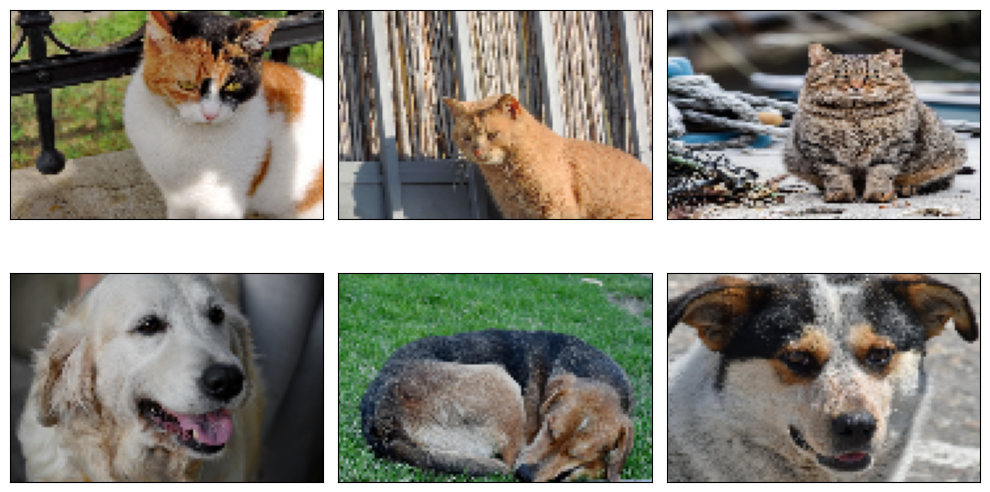

In [34]:
image_dataset=ImageDataset(file_list, labels, transform)

fig=plt.figure(figsize=(10,6))

for i, sample in enumerate(image_dataset):
    ax=fig.add_subplot(2,3,i+1)
    ax.set_xticks([]);ax.set_yticks([])
    ax.imshow(sample[0].numpy().transpose(1,2,0)) # 이미지 출력을 위해 2차원 변환

plt.tight_layout()
plt.show()

In [36]:
# # Celeba datasets
# import torchvision

# image_path = './'
# celeba_dataset = torchvision.datasets.CelebA(image_path, split='train', target_type='attr', download=True)

# assert isinstance(celeba_dataset, torch.utils.data.Dataset)

(<PIL.Image.Image image mode=L size=28x28 at 0x1EEC02622C0>, 5)


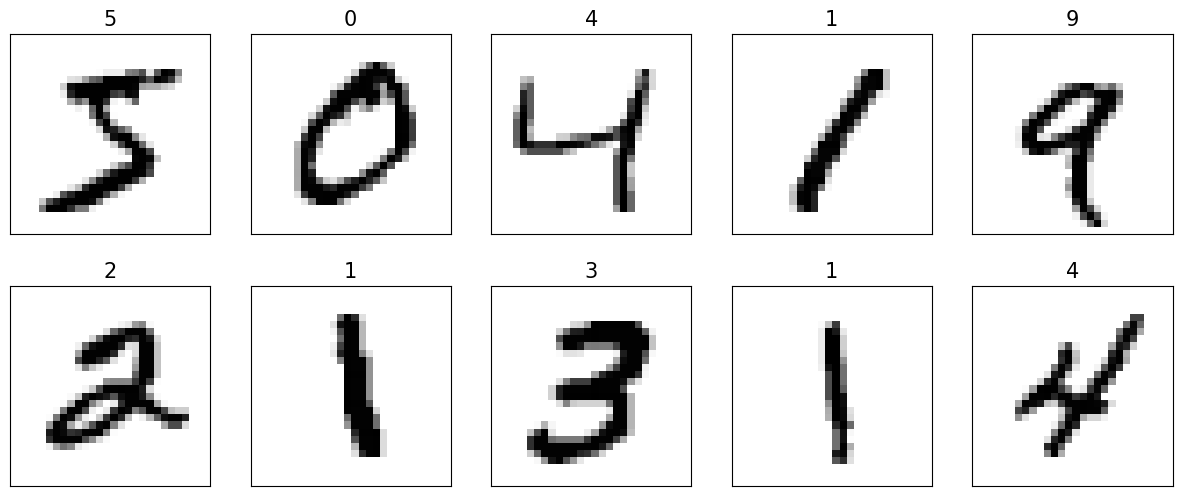

In [3]:
import torchvision
import torch
from itertools import islice
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

image_path='./'

mnist_dataset = torchvision.datasets.MNIST(image_path, 'train', download=True)

assert isinstance(mnist_dataset, torch.utils.data.Dataset)

example = next(iter(mnist_dataset))
print(example)

fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)

#plt.savefig('figures/12_06.pdf')
plt.show()